In [1]:
import numpy as np
import pandas as pd
import keras
import keras.backend as kb
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from datetime import date as dt
from datetime import datetime
from datetime import timedelta

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

import tqdm
import tensorflow_addons as tfa
from keras_tqdm import TQDMNotebookCallback
from tqdm.keras import TqdmCallback

df3 = pd.read_csv('Datasets/covid_19_india.csv')

df3

Using TensorFlow backend.


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
1409,1410,28/04/20,5:00 PM,Telengana,-,-,321,26,1004
1410,1411,28/04/20,5:00 PM,Tripura,-,-,2,0,2
1411,1412,28/04/20,5:00 PM,Uttarakhand,-,-,33,0,51
1412,1413,28/04/20,5:00 PM,Uttar Pradesh,-,-,400,31,2043


In [2]:
df3['Date']
#df['Date'] = pd.to_datetime(df.Date)

D=[]
for item in df3['Date']:
    day = item[0]+item[1]
    month = item[3] + item[4]
    year = item[6] + item[7]
    xx = day + '-' + month + '-' + year
    xx = datetime.strptime(xx, '%d-%m-%y') 
    D.append(xx)

#Making a List of Dates such that they are understandable

df3['Date'] = D



df3

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
1409,1410,2020-04-28,5:00 PM,Telengana,-,-,321,26,1004
1410,1411,2020-04-28,5:00 PM,Tripura,-,-,2,0,2
1411,1412,2020-04-28,5:00 PM,Uttarakhand,-,-,33,0,51
1412,1413,2020-04-28,5:00 PM,Uttar Pradesh,-,-,400,31,2043


In [3]:
df3['Day'] = (df3['Date'] - df3['Date'].min())  / np.timedelta64(1,'D')

df3

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Day
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,0.0
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1.0
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2.0
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,3.0
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,4.0
...,...,...,...,...,...,...,...,...,...,...
1409,1410,2020-04-28,5:00 PM,Telengana,-,-,321,26,1004,89.0
1410,1411,2020-04-28,5:00 PM,Tripura,-,-,2,0,2,89.0
1411,1412,2020-04-28,5:00 PM,Uttarakhand,-,-,33,0,51,89.0
1412,1413,2020-04-28,5:00 PM,Uttar Pradesh,-,-,400,31,2043,89.0


In [4]:
df3['Active'] = df3['Confirmed'] - df3['Deaths'] - df3['Cured']

df3

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Day,Active
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,0.0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1.0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2.0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,3.0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,4.0,3
...,...,...,...,...,...,...,...,...,...,...,...
1409,1410,2020-04-28,5:00 PM,Telengana,-,-,321,26,1004,89.0,657
1410,1411,2020-04-28,5:00 PM,Tripura,-,-,2,0,2,89.0,0
1411,1412,2020-04-28,5:00 PM,Uttarakhand,-,-,33,0,51,89.0,18
1412,1413,2020-04-28,5:00 PM,Uttar Pradesh,-,-,400,31,2043,89.0,1612


# Uttarakhand

In [5]:
df3 = df3.loc[df3['State/UnionTerritory'] == 'Uttarakhand']

df3.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Day,Active
161,162,2020-03-15,6:00 PM,Uttarakhand,1,0,0,0,1,45.0,1
176,177,2020-03-16,6:00 PM,Uttarakhand,1,0,0,0,1,46.0,1
191,192,2020-03-17,6:00 PM,Uttarakhand,1,0,0,0,1,47.0,1
207,208,2020-03-18,6:00 PM,Uttarakhand,1,0,0,0,1,48.0,1
226,227,2020-03-19,6:00 PM,Uttarakhand,1,0,0,0,1,49.0,1


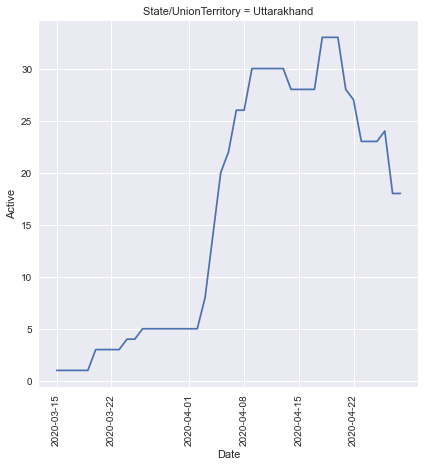

In [6]:
plt.style.use('seaborn')
g = sns.FacetGrid(df3, col="State/UnionTerritory", hue="State/UnionTerritory", 
                  sharey=False, col_wrap=1,height=6, aspect=1)
g = g.map(plt.plot, "Date", "Active")
g.set_xticklabels(rotation=90)
plt.show()

In [7]:
df3 = df3.sort_values(by=['Day'])
df3.drop(df3.iloc[:, 0:9], inplace = True, axis = 1)
df3 = df3.groupby(['Day'],as_index=False).sum()

df3.head()

,Day,Active
0,45.0,1
1,46.0,1
2,47.0,1
3,48.0,1
4,49.0,1


In [8]:
X1 = df3['Day']
y1 = df3['Active']


X1=np.array(X1,dtype='float')
y1 = np.array(y1,dtype='int')


X1=X1.reshape(-1,1)
y1=y1.reshape(-1,1)


In [9]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30, shuffle=False)

In [10]:
model1 = Sequential()
model1.add(Dense(500, input_dim=1, activation= "relu"))
model1.add(Dense(100, activation= "relu"))
model1.add(Dense(50, activation= "relu"))
model1.add(Dense(1))

In [11]:
optimizer = tf.keras.optimizers.RMSprop(0.0099)
model1.compile(loss='mean_squared_error',optimizer=optimizer)
print('>>> Training Started...0.5 mins to go..')
model1.fit(X1,y1,epochs=280000, verbose=0)
#callbacks=[TQDMNotebookCallback()] for TQDM Progress

>>> Training Started...0.5 mins to go..


In [12]:
predict1 = model1.predict(X_test1)

print(X_test1.flatten())
print('*****************************************************')    
print(predict1.flatten())
print('*****************************************************')
print(y_test1.flatten())

[76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.]
*****************************************************
[29.903854 30.068562 30.23327  30.397978 30.562687 30.727394 29.455694
 27.407177 25.358648 24.210478 23.077335 21.9442   20.811066 19.67793 ]
*****************************************************
[28 28 28 33 33 33 28 27 23 23 23 24 18 18]


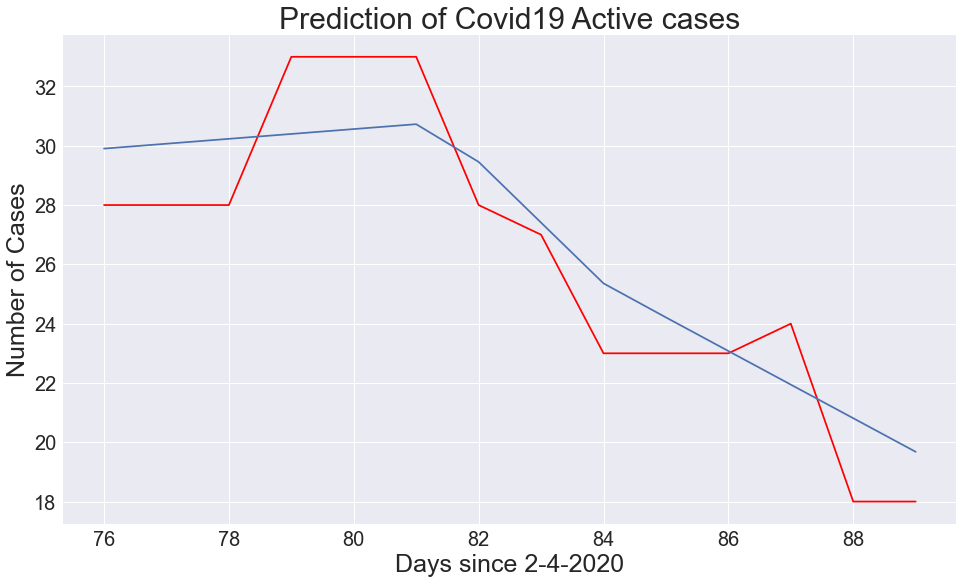

In [13]:
plt.figure(figsize=(16,9))
plt.title('Prediction of Covid19 Active cases', size=30)
plt.xlabel('Days since 2-4-2020', size=25)
plt.ylabel('Number of Cases',size=25)
plt.xticks(size=20)
plt.yticks(size=20)
plt.plot()
plt.plot(X_test1, y_test1, color = 'red')
plt.plot(X_test1, predict1)